# Year Barreiro - Exploratory Data Analysis, in the context of the WISDom project

### Data from a water distribution system sensor located in Barreiro, for the year 2018

## Start

### Import necessary libraries

In [1]:
# Basics
import pandas as pd
import numpy as np
import time as tm
import math
# For Exploratory Data Analysis (EDA)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [2]:
features = ["date", "time", "value", "detection"]

barreiro_ano = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/barreiro_ano.csv', sep = ';', names = features)
# train_barreiro 1,2,3,4
# test_barreiro 1,2,3,4
# holidays

#### Visualize data

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
barreiro_ano.head(15)

,date,time,value,detection
0,01/01/2018,00:07:30,18.333067,0
1,01/01/2018,00:22:30,18.333067,0
2,01/01/2018,00:37:30,19.784872,0
3,01/01/2018,00:52:30,22.294744,0
4,01/01/2018,01:07:30,27.229756,0
5,01/01/2018,01:22:30,27.615883,0
6,01/01/2018,01:37:30,26.663889,0
7,01/01/2018,01:52:30,24.244111,0
8,01/01/2018,02:07:30,22.159583,0
9,01/01/2018,02:22:30,18.577917,0


## Dataset info

#### Features

In [5]:
# Names of columns
print('Feature Names')
print(barreiro_ano.columns)

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')


#### Data dimension

In [6]:
print('Data Dimension:')
print('Number of Records:', barreiro_ano.shape[0])
print('Number of Features:', barreiro_ano.shape[1])

Data Dimension:
Number of Records: 35040
Number of Features: 4


#### Shape

In [7]:
barreiro_ano.shape

(35040, 4)

#### Info (types)

In [8]:
# Understand the data type of each feature
# .info() to get a concise summary of the dataframe
barreiro_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       35040 non-null  object 
 1   time       35040 non-null  object 
 2   value      35040 non-null  float64
 3   detection  35040 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


### Missing values

In [9]:
# Discover how many data is missing
missing = barreiro_ano.isnull().sum()

print(missing)

date         0
time         0
value        0
detection    0
dtype: int64


In [15]:
# Per summary there aren't null values

### Skewnes

In [ ]:
# The skewness for a normal distribution is zero, and any symmetric data
# should have a skewness near zero.
# Negative values for the skewness indicate data that are skewed left and positive values for the
# skewness indicate data that are skewed right.
# By skewed left, it means that the left tail is long relative to the right tail.
# Similarly, skewed right means that the right tail is long relative to the left tail.

In [10]:
print('Skewness of the below features:')
print(barreiro_ano.skew())

Skewness of the below features:
value         0.894086
detection    20.230491
dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

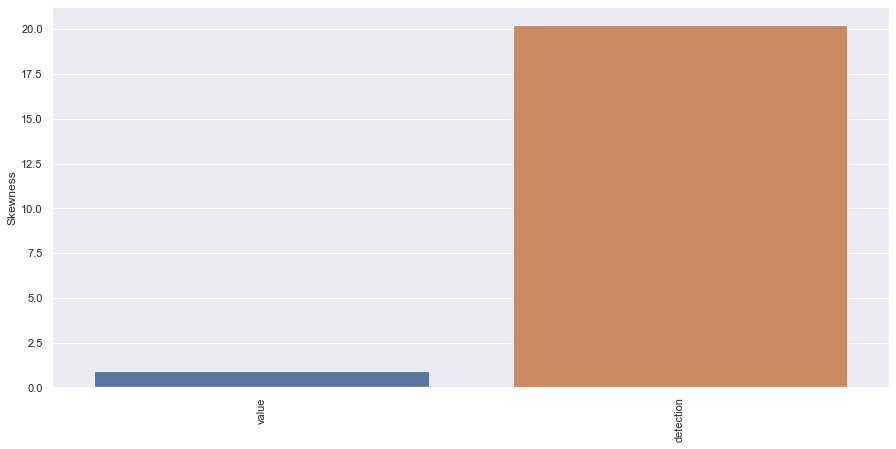

In [11]:
# Graph view
skew = barreiro_ano.skew()
skew_df = pd.DataFrame(skew, index = None, columns = ['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x = skew_df.index, y = 'Skewness', data = skew_df)
plt.xticks(rotation = 90)

### Datetime

#### Check if pandas is handling the DATE column as simple objects or pandas built-in Datetime data type

In [12]:
barreiro_ano.date

0        01/01/2018
1        01/01/2018
2        01/01/2018
3        01/01/2018
4        01/01/2018
            ...    
35035    31/12/2018
35036    31/12/2018
35037    31/12/2018
35038    31/12/2018
35039    31/12/2018
Name: date, Length: 35040, dtype: object

#### As dealing with simple objects, we need to convert to Datetime

In [13]:
barreiro_ano.date = pd.to_datetime(barreiro_ano.date)
barreiro_ano.date

0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
35035   2018-12-31
35036   2018-12-31
35037   2018-12-31
35038   2018-12-31
35039   2018-12-31
Name: date, Length: 35040, dtype: datetime64[ns]

#### Add a 'month' column to he dataset to analyse data at monthly

In [14]:
barreiro_ano['month'] = barreiro_ano['date'].dt.month
# The month as January=1, December=12

In [15]:
barreiro_ano

,date,time,value,detection,month
0,2018-01-01,00:07:30,18.333067,0,1
1,2018-01-01,00:22:30,18.333067,0,1
2,2018-01-01,00:37:30,19.784872,0,1
3,2018-01-01,00:52:30,22.294744,0,1
4,2018-01-01,01:07:30,27.229756,0,1
...,...,...,...,...,...
35035,2018-12-31,22:52:30,24.792000,0,12
35036,2018-12-31,23:07:30,23.029933,0,12
35037,2018-12-31,23:22:30,20.415628,0,12
35038,2018-12-31,23:37:30,22.019056,0,12


### Monthly Mean Flow 2018

In [16]:
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in np.arange(1,13,1):
    print(month_label[i-1],'mean flow:', np.mean(barreiro_ano[barreiro_ano['month']==i]['value'].values))

Jan mean flow: 28.44249346354402
Feb mean flow: 30.775725399448664
Mar mean flow: 26.750138347949935
Apr mean flow: 28.316218195804513
May mean flow: 35.8705528060205
Jun mean flow: 39.55726200497292
Jul mean flow: 43.37850580115457
Aug mean flow: 45.32908177719825
Sep mean flow: 44.024363397473955
Oct mean flow: 34.4802574664375
Nov mean flow: 27.656000097223266
Dec mean flow: 26.72703065529805


### Year Mean Flow 2018

In [17]:
print('Year mean flow:',np.mean(barreiro_ano['value'].values))

Year mean flow: 34.29768627916298


Mean: Standard mean of the centre of the data distribution.

#### Describe

In [18]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset distribution, excluding NaN values
barreiro_ano.describe()

,value,detection,month
count,35040.000000,35040.000000,35040.000000
mean,34.297686,0.002426,6.526027
std,18.234363,0.049193,3.447901
min,3.416723,0.000000,1.000000
25%,21.773553,0.000000,4.000000
50%,30.735589,0.000000,7.000000
75%,44.598200,0.000000,10.000000
max,131.778461,1.000000,12.000000


#### Median = 50%

In [19]:
import statistics
statistics.median(barreiro_ano['value'])

30.735588890000002

The mean and median show little difference between them, but cannot be considered similar, concluding that the data is not symmetric.

## Distribution and Density

### Feature Density 

(kde plot — kernel density estimation plot)

#### Value Density

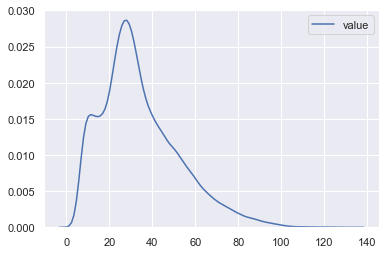

In [20]:
sns.kdeplot(barreiro_ano['value'])

Y label - Estimation of the relative frequency of each value.
In probabilistic terms, it is an estimate of the probability density function of the feature.

#### Distplot

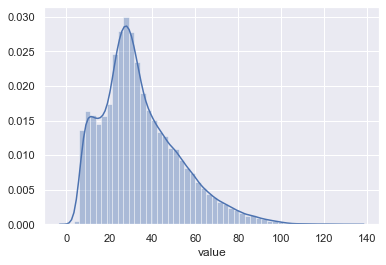

In [21]:
sns.distplot(barreiro_ano['value'])

### Categorical Data

#### Breakdown of events by anomaly

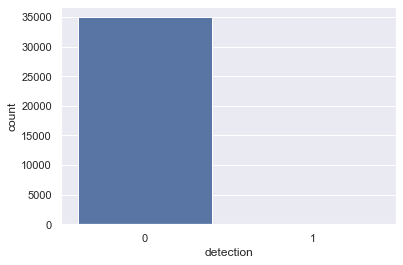

In [22]:
sns.countplot(barreiro_ano['detection'])

In [23]:
barreiro_ano['detection'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
35035    False
35036    False
35037    False
35038    False
35039    False
Name: detection, Length: 35040, dtype: bool

In [24]:
# Class balance
class_dist=barreiro_ano.groupby('detection').size()
# But it is interesting the percentwise distribution of each class
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Detection',class_dist.index[i])
    print('%.2f'% percent,'%')

Detection 0
99.76 %
Detection 1
0.24 %


Backwards to the results shown in the previous graph, anomalies were recorded in the dataset.

### Convert the DATE column to index

In [29]:
barreiro_ano.set_index('date',inplace=True)

In [30]:
barreiro_ano

,time,value,detection,month
date,,,,
2018-01-01,00:07:30,18.333067,0,1
2018-01-01,00:22:30,18.333067,0,1
2018-01-01,00:37:30,19.784872,0,1
2018-01-01,00:52:30,22.294744,0,1
2018-01-01,01:07:30,27.229756,0,1
...,...,...,...,...
2018-12-31,22:52:30,24.792000,0,12
2018-12-31,23:07:30,23.029933,0,12
2018-12-31,23:22:30,20.415628,0,12


#### Time series: series of data points indexed in order of time

### Indexing in time series data

#### Getting all data from to 2018-01-01 to 2018-06-01

Syntax: [ 'start data' : 'end data' ]

In [34]:
barreiro_ano.loc['2018-01-01':'2018-06-01']

,time,value,detection,month
date,,,,
2018-01-01,00:07:30,18.333067,0,1
2018-01-01,00:22:30,18.333067,0,1
2018-01-01,00:37:30,19.784872,0,1
2018-01-01,00:52:30,22.294744,0,1
2018-01-01,01:07:30,27.229756,0,1
...,...,...,...,...
2018-05-12,22:52:30,21.788367,0,5
2018-05-12,23:07:30,18.617633,0,5
2018-05-12,23:22:30,16.237333,0,5


### Data every 12 months

Syntax: [ 'start data' : 'end data' : step ]

In [35]:
barreiro_ano['2018-01-01':'2018-12-01':12]

,time,value,detection,month
date,,,,
2018-01-01,00:07:30,18.333067,0,1
2018-01-01,03:07:30,16.676861,0,1
2018-01-01,06:07:30,16.732894,0,1
2018-01-01,09:07:30,20.762122,0,1
2018-01-01,12:07:30,46.988278,0,1
...,...,...,...,...
2018-11-12,09:07:30,25.740233,0,11
2018-11-12,12:07:30,20.698589,0,11
2018-11-12,15:07:30,17.214550,0,11


It would work if we had 1 record each day. So it doesn't make sense for the study.

### Time-Resampling using Pandas

#### Important rules for which we resample our time series index

M = fim do mês

A = fim do ano

MS = inicio do mês

AS = inicio do ano

#### Calculate the average flow rate at the beginning of each month

In [39]:
barreiro_ano.resample(rule = 'MS').mean().head(12)

,value,month
date,,
2018-01-01,28.442493,1
2018-02-01,30.775725,2
2018-03-01,26.750138,3
2018-04-01,28.316218,4
2018-05-01,35.870553,5
2018-06-01,39.557262,6
2018-07-01,43.378506,7
2018-08-01,45.329082,8
2018-09-01,44.024363,9


#### == Monthly Mean Flow 2018

### Rolling Time-Series

#### Similar to Time-Resampling, but take a window of any size and run a function on it.
A rolling window of size k means k consecutive values.

#### Calculating the 10-day moving average

In [40]:
barreiro_ano.rolling(window=10).mean().head(20) # head to see first 20 values

,value,detection,month
date,,,
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN


NaN means that there are not enough values to calculate the moving average for the first 10 days.

### Check the maximum value in a 30-day window

In [41]:
barreiro_ano.rolling(window=30).max()[30:].head(20)

,value,detection,month
date,,,
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0
2018-01-01,28.645564,0.0,1.0


### Check the maximum value in a 90-day window

In [42]:
barreiro_ano.rolling(window=90).max()[90:].head(90)

,value,detection,month
date,,,
2018-01-01,47.853558,0.0,1.0
2018-01-01,47.853558,0.0,1.0
2018-01-01,47.853558,0.0,1.0
2018-01-01,47.853558,0.0,1.0
2018-01-01,47.853558,0.0,1.0
2018-01-01,47.853558,0.0,1.0
2018-02-01,47.853558,0.0,2.0
2018-02-01,47.853558,0.0,2.0
2018-02-01,47.853558,0.0,2.0


## Plotting Time Series Data using Pandas

#### df.plot - basic graph to see the flow value over time

x-axis - time series index

y axis - values

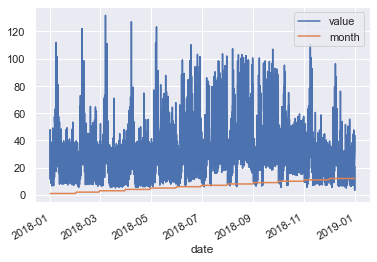

In [43]:
barreiro_ano.plot()

### Add a title and the label y using .set  &  Changing the chart size using figsize

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Flow Rate Value')]

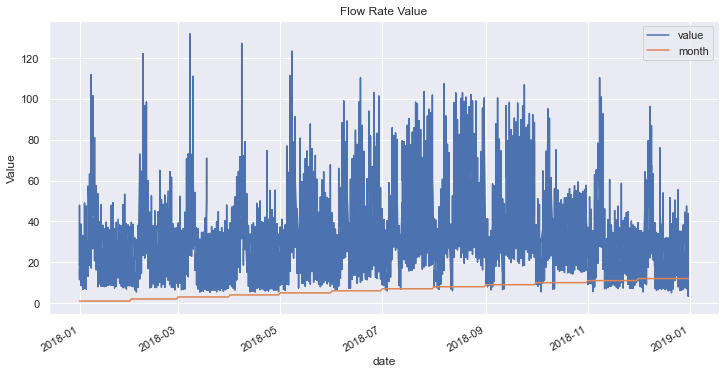

In [46]:
ax = barreiro_ano.plot(figsize=(12,6))
ax.set(title='Flow Rate Value', ylabel='Value')

### Graphically represent the average for each month

[Text(0, 0.5, 'Value of Mean of Starting of Month'),
 Text(0.5, 1.0, 'Average Flow Rate')]

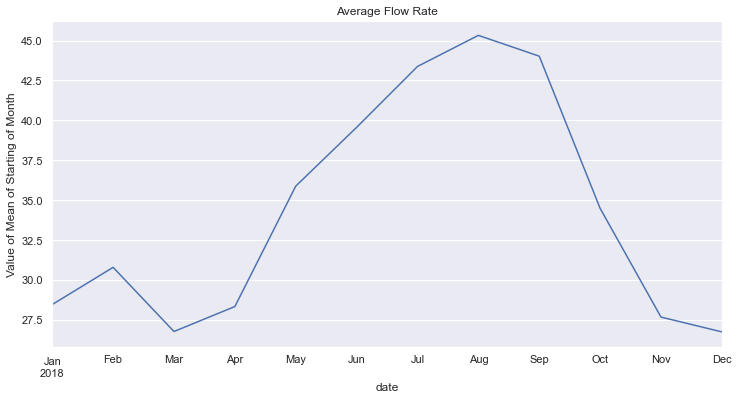

In [48]:
ax = barreiro_ano['value'].resample(rule='MS').mean().plot(figsize=(12,6))
ax.set(title='Average Flow Rate', ylabel='Value of Mean of Starting of Month')

### Bar graph for the average start of each month by calling .bar on top of .plot

[Text(0, 0.5, 'Value of Mean of Starting of Month'),
 Text(0.5, 1.0, 'Average Flow Rate')]

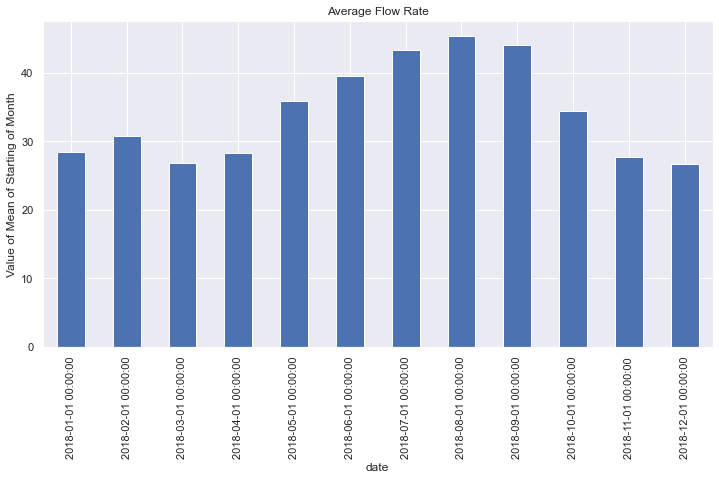

In [49]:
ax = barreiro_ano['value'].resample(rule='MS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average Flow Rate', ylabel='Value of Mean of Starting of Month')

### Plot the moving average and the normal average for the beginning of the month

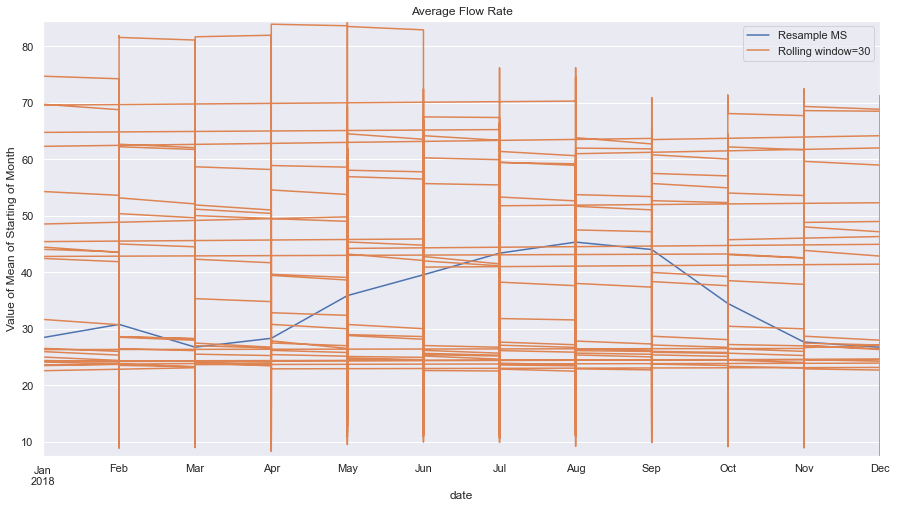

In [50]:
ax = barreiro_ano['value'].resample(rule='MS').mean().plot(figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
barreiro_ano.rolling(window=30).mean()['value'].plot(label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average Flow Rate')
ax.legend()

### Plot for specific dates according to personal choice

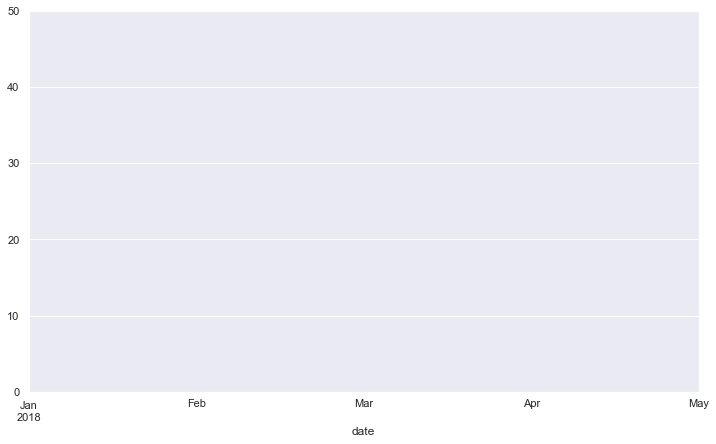

In [56]:
ax = barreiro_ano['value'].resample(rule='MS').max().plot(xlim=["2018-01-01","2018-05-01"],ylim=[0,50], figsize=(12,7))
ax.yaxis.grid(True)
ax.xaxis.grid(True)